# 1.Import dependencsis and Load Cleaned Datasets

In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('..')  
from src.data import preprocess


# Set styles
sns.set(style='whitegrid')


# Load and clean oil price data
oil_raw = pd.read_csv(r"C:\Users\hp\Desktop\10 Acadamy\VS code\brent-oil-change-point-analysis\data\raw\BrentOilPrices.csv")
oil_clean = preprocess.clean_price_data(oil_raw)

# Load and clean event data
events_raw = pd.read_csv(r"C:\Users\hp\Desktop\10 Acadamy\VS code\brent-oil-change-point-analysis\data\raw\event_data_unprocessed.csv")
events_clean = preprocess.clean_event_data(events_raw)

c:\Users\hp\Desktop\10 Acadamy\VS code\brent-oil-change-point-analysis\noteboks\..\src\data\preprocess.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


# 2. Basic Info

In [4]:
# Oil Data
print("Oil Price Data:")
display(oil_clean.head())
print(oil_clean.info())
print(oil_clean.describe())

# Event Data
print("Event Data:")
display(events_clean.head())
print(events_clean.info())
print(events_clean['ExpectedImpact'].value_counts())

Oil Price Data:


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB
None
                                Date        Price
count                           9011  9011.000000
mean   2005-02-10 23:46:53.760958720    48.420782
min              1987-05-20 00:00:00     9.100000
25%              1996-03-20 12:00:00    19.050000
50%              2005-02-02 00:00:00    38.570000
75%              2014-01-09 12:00:00    70.090000
max              2022-11-14 00:00:00   143.950000
std                              NaN    32.860110
Event Data:


,EventName,EventDate,Description,ExpectedImpact
0,Gulf War Begins,1990-08-02,Iraq invades Kuwait leading to supply disrupti...,High
6,Asian Oil Crisis,1990-10-01,Supply disruptions in Asia leading to short-te...,Medium
1,Asian Financial Crisis,1997-07-02,"Economic downturn reduces oil demand in Asia, ...",Medium
12,Venezuela Oil Strike,2002-12-02,"Strike reduces Venezuelan oil output, tighteni...",Medium
5,Iraq War Starts,2003-03-20,US-led invasion causes uncertainty and price v...,High


<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, 0 to 4
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   EventName       15 non-null     object        
 1   EventDate       15 non-null     datetime64[ns]
 2   Description     15 non-null     object        
 3   ExpectedImpact  15 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 600.0+ bytes
None
ExpectedImpact
High      8
Medium    6
Low       1
Name: count, dtype: int64


# 3. Time Series Plot of Brent Oil Prices

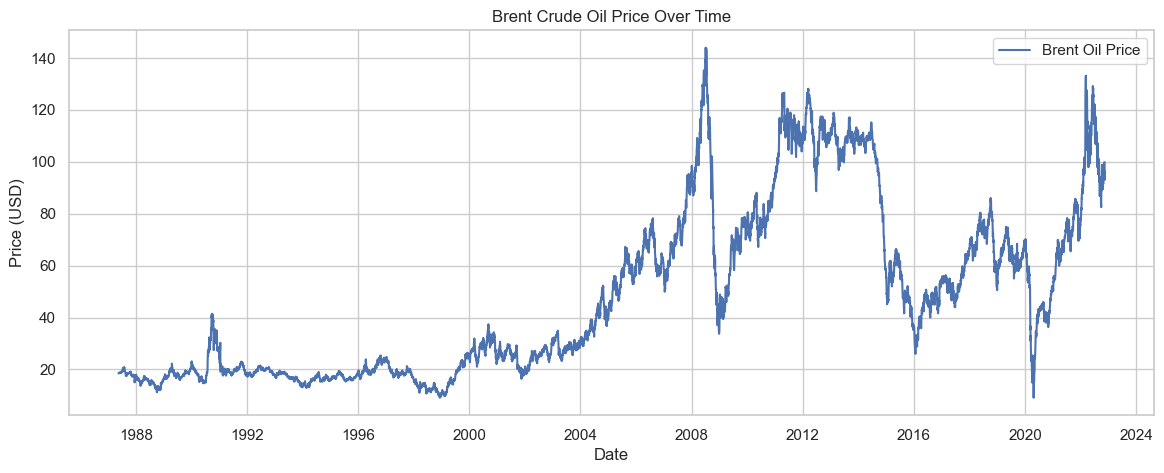

In [5]:
plt.figure(figsize=(14, 5))
plt.plot(oil_clean["Date"], oil_clean["Price"], label="Brent Oil Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Brent Crude Oil Price Over Time")
plt.legend()
plt.show()

# 4. Event Impact Summary

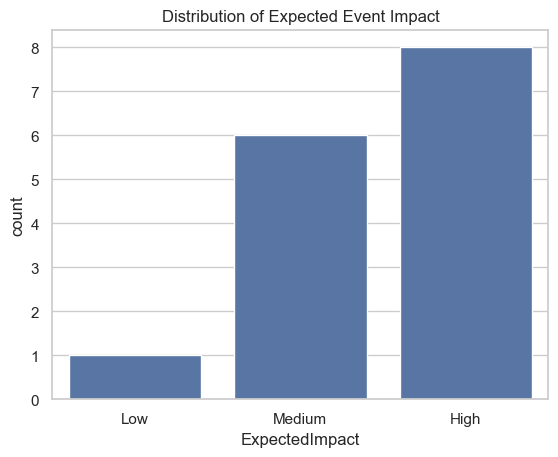

In [6]:
sns.countplot(data=events_clean, x="ExpectedImpact", order=["Low", "Medium", "High"])
plt.title("Distribution of Expected Event Impact")
plt.show()

# 5. Merging Oil Prices and Events

In [7]:
# Merge oil prices and events on date
merged = pd.merge(oil_clean, events_clean, left_on="Date", right_on="EventDate", how="left")

# Show sample of merged data
display(merged[merged["EventName"].notna()].head())

,Date,Price,EventName,EventDate,Description,ExpectedImpact
818,1990-08-02,22.25,Gulf War Begins,1990-08-02,Iraq invades Kuwait leading to supply disrupti...,High
860,1990-10-01,38.95,Asian Oil Crisis,1990-10-01,Supply disruptions in Asia leading to short-te...,Medium
2574,1997-07-02,18.83,Asian Financial Crisis,1997-07-02,"Economic downturn reduces oil demand in Asia, ...",Medium
3945,2002-12-02,25.73,Venezuela Oil Strike,2002-12-02,"Strike reduces Venezuelan oil output, tighteni...",Medium
4020,2003-03-20,28.00,Iraq War Starts,2003-03-20,US-led invasion causes uncertainty and price v...,High


# 6. Impact of Events on Price 

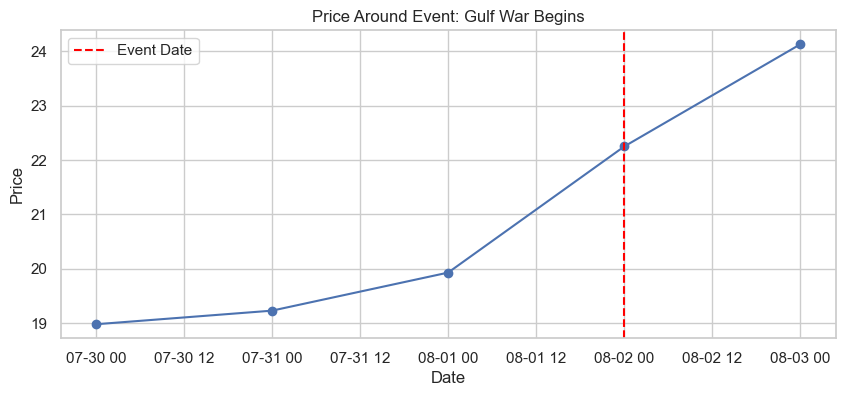

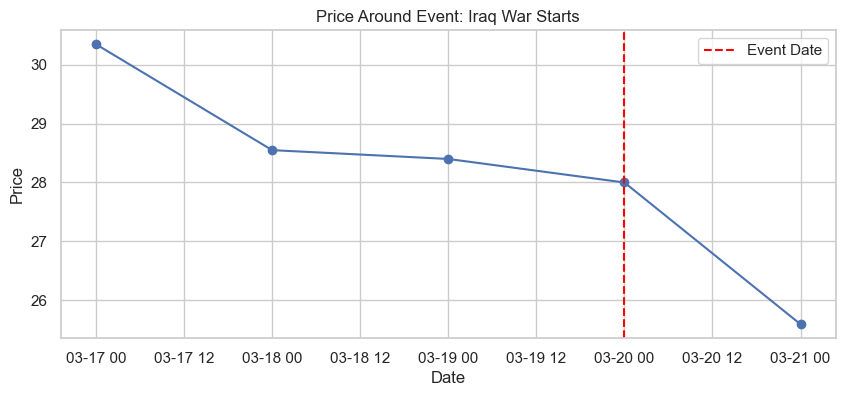

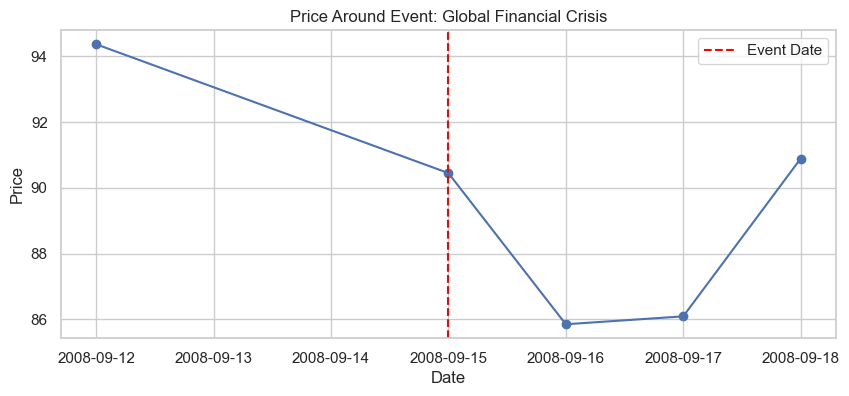

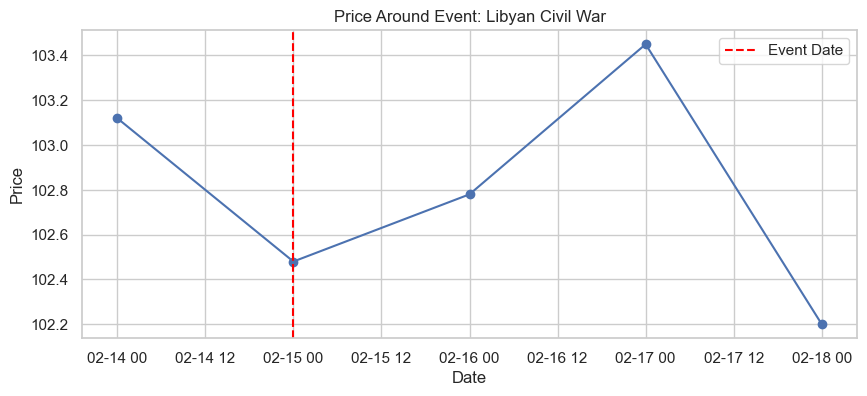

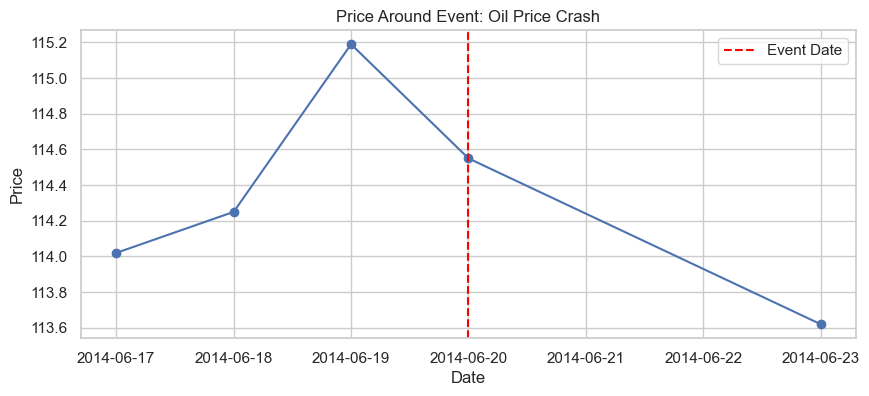

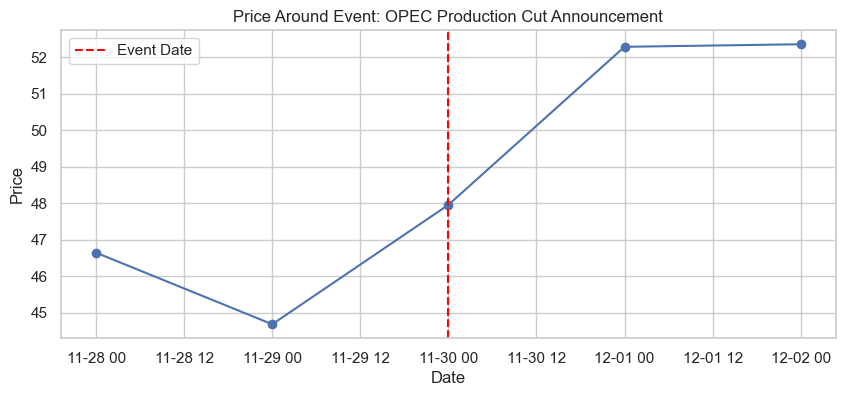

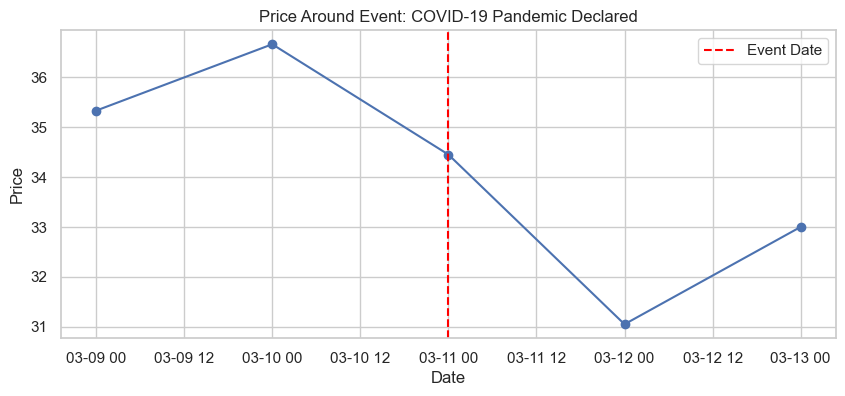

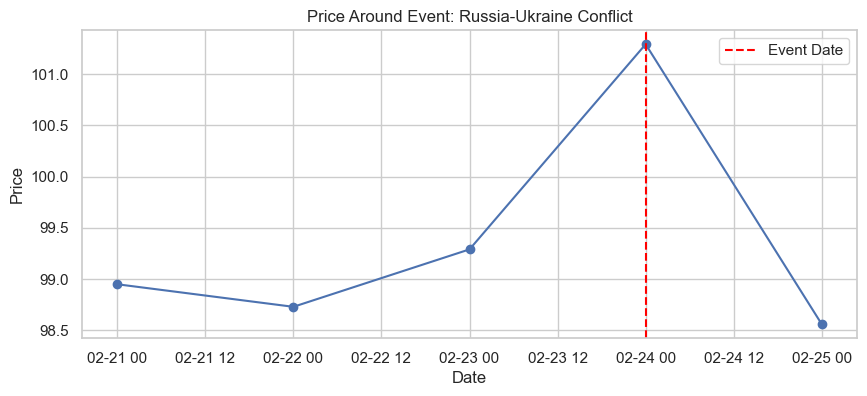

In [ ]:
# Investigate oil price behavior around major events (optional)
from datetime import timedelta

# filter 3-day window around high-impact events
high_impact_events = events_clean[events_clean["ExpectedImpact"] == "High"]
for _, event in high_impact_events.iterrows():
    event_date = event["EventDate"]
    window = oil_clean[(oil_clean["Date"] >= event_date - timedelta(days=3)) &
                       (oil_clean["Date"] <= event_date + timedelta(days=3))]
    plt.figure(figsize=(10, 4))
    plt.plot(window["Date"], window["Price"], marker="o")
    plt.axvline(event_date, color="red", linestyle="--", label="Event Date")
    plt.title(f"Price Around Event: {event['EventName']}")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()